# Lab 8: Define and Solve an ML Problem of Your Choosing

In [101]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [102]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. We have selected the Adult Census Income Dataset. which contains details about work-related information, economics, educations and more.
2. The goal of our project is to predict an individual's martital status using the available features in the dataset. The label in this project will be the marital-status column, which we will convert into a binary variable: "Married" and "Not Married". 
3. This project is supervised learning, where the model is trained on labeled data and learn to predict marital status based on feature inputs. This project is a classification problem where we will be using a binary classification, since there will only be two groups either "Married" or "Not Married".
4. Some of the features we will be using in our model include age, race, income, education, and country. We mainly chose these features because they may have meaningful relationships with an individual's martial status and can help the model make more accurate predictions.
5. Predicting martial status is valuable because it helps companies better understand population trends and tailor their services accordingly. Marital status often influences spending habits, housing choices, and financial planning, all of which are important for marketing and economic forecasting. With this information, businesses can create targeted campaigns and design products that align with the needs of different demographic groups.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. Some of the data preparation techniques I would use:

   • Dropping irrelevant/redundant features such as the "relationship" column since it might cause a data leakage in the model.

   • I would also rename some of the features so all the format can be consistent. I would start by replacing all the hyphens with a       underscore.
   
   • I would turn my label into a binary variable, where 1 represents married individuals and 0 represents all other statues "Not          Married".
   
   • Applying one-hot encoding to our categorical features like race, education, occupation...
   
   • Removing out irrelvant features that we will not be using to train our model
   
   • Handling missing values

3. We plan on using Logistic Regression and Decision Tree Classifier for our binary classification of prediciting marital status.
   • For our Logisitc Regression, we plan on applying feature scaling to our numerical features, since logistic regression is sensitive to the scale of input features
   • For Decision Trees, we don't necessarily need to scale our features. However, both dataset should include one-hot encoding features.
   
4. We will evaluate our model by using a test set. We will also use cross-validation to get the estimate of the performance and reduce overfitting, and prevent overgeneralizing. We will also be using a ROC-AUC Score to check how out mdoel separated the two classes acrodd all thresholds. 

In [103]:
# YOUR CODE HERE
# Finding all the column names in our data set
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


In [104]:
# Find the data types we have in our dataset
print(df.dtypes)

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


In [105]:
# Checking for missing values
nan_count = np.sum(df.isnull())
nan_detected = nan_count!=0
print(nan_count)
print (nan_detected)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64
age                True
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country     True
income_binary     False
dtype: bool


In [106]:
# Looking at Statistical Data
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [107]:
# Checking out our label columns
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [108]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [109]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital-gain        106
capital-loss         92
hours-per-week       94
native-country       41
income_binary         2
dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

1. After inspecting the data, we have decided to add "sex" as one of as features. Therefore, we will be keeping features such as age, race, income_binary, native-country, education and hours_per_week. 

2. Some of the data preparation techniques I would use:

   • Dropping irrelevant/redundant features such as the "relationship" column since it might cause a data leakage in the model.

   • I would also rename some of the features so all the format can be consistent. I would start by replacing all the hyphens with a       underscore.
   
   • I would turn my label into a binary variable, where 1 represents married individuals and 0 represents all other statues "Not          Married".
   
   • Applying one-hot encoding to our categorical features like race, education, occupation...
   
   • Removing out irrelvant features that we will not be using to train our model
   
   • Handling missing values

3. For this binary classification task, we plan to use two machine learning models: Logistic Regression and Decision Tree Classifier. Additionally, we will train two Decision Tree models: one Decision Tree will be trained using all available features in the dataset.The second Decision Tree will be trained using the same selected features used in the Logistic Regression model. This approach allows us to make a more meaningful comparison between the two models and understand how feature selection impacts model performance and generalization.


4. First, we will begin by prepare our data. This includes cleaning all necessary components by removing irrelevant or redundant features, handling misisng values and more. Once the data is cleaned and preprocessed, we will proceed to train our model and evaluate their performances using cross-validation and other classification metrics such as accuracy, precision, recall, F1 scores, and ROC-AUC. We will train our model by splitting the data into training, validation, and testing sets, ensuring that the models are evaluated on unseen data and generalize well. We will adjust the hyperparameters to optimize our model performances. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [110]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Cleaning/Preparing Data 

### Renaming Features 

In [111]:
# YOUR CODE HERE
# Data Prep
# Replacing all '-' with '_' for consistency
df.columns = df.columns.str.replace('-','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_binary'],
      dtype='object')

### Handling Missing Values 

In [112]:
df.shape

(32561, 15)

In [113]:
# Checking missing values
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital_gain         0
capital_loss         0
hours_per_week     325
native_country     583
income_binary        0
dtype: int64

In [114]:
# Looking at the number of unique values for the data set 
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital_gain        106
capital_loss         92
hours_per_week       94
native_country       41
income_binary         2
dtype: int64

In [115]:
# Dealing with Missing Values
df.dropna(inplace=True)

In [116]:
df.shape

(29716, 15)

### Dropping Redundant Features

In [117]:
# Identify Correlation
corr_matrix = round(df.corr(),5)
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00000,-0.07678,0.04479,0.12729,0.06130,0.10004
fnlwgt,-0.07678,1.00000,-0.04639,-0.00238,-0.00936,-0.02189
education_num,0.04479,-0.04639,1.00000,0.16701,0.07904,0.15199
capital_gain,0.12729,-0.00238,0.16701,1.00000,-0.05621,0.10288
capital_loss,0.06130,-0.00936,0.07904,-0.05621,1.00000,0.05259
hours_per_week,0.10004,-0.02189,0.15199,0.10288,0.05259,1.00000


In [118]:
# Dropping Unnecessary or Redundant Features: relationship, fnlwgt, education
df.drop(columns=['fnlwgt','relationship','education'], inplace=True)

In [119]:
df.head()

,age,workclass,education_num,marital_status,occupation,race,sex_selfID,capital_gain,capital_loss,hours_per_week,native_country,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40.0,Cuba,<=50K


In [120]:
df.shape

(29716, 12)

### Turning my features into one-hot encoding 

In [121]:
df.dtypes

age               float64
workclass          object
education_num       int64
marital_status     object
occupation         object
race               object
sex_selfID         object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
native_country     object
income_binary      object
dtype: object

In [122]:
# Using One-Hot encoding

df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1})
df = pd.get_dummies(df, columns=['occupation', 'race', 'sex_selfID', 'native_country','workclass'], drop_first=True)

In [123]:
df.columns

Index(['age', 'education_num', 'marital_status', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income_binary',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_selfID_Non-Female',
       'native_country_Canada', 'native_country_China',
       'native_country_Columbia', 'native_country_Cuba',
       'native_country_Dominican-Republic', 'native_country_Ecuador',
       'native_country_El-Salvador', 'native_country_England',
       'native_country_France', 'native_country_Germany',
       'native_country_Greece', 'native_country_Gu

### Creating Label from the Data Set

In [124]:
df['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [125]:
married_values = ['Married-civ-spouse','Married-AF-spouse', 'Married-spouse-absent']

df['marital_status_binary'] = df['marital_status'].apply(
    lambda x: 1 if x in married_values else 0
)

In [126]:
df['marital_status_binary'].value_counts()

0    15466
1    14250
Name: marital_status_binary, dtype: int64

In [127]:
df.drop(columns=['marital_status'], inplace=True)

In [128]:
df.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_binary', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_selfID_Non-Female', 'native_country_Canada',
       'native_country_China', 'native_country_Columbia',
       'native_country_Cuba', 'native_country_Dominican-Republic',
       'native_country_Ecuador', 'native_country_El-Salvador',
       'native_country_England', 'native_country_France',
       'native_country_Germany', 'native_country_Greece',
       'native_country_Guatemala', 'native_

In [129]:
# Creating Label from the data set 
y = df['marital_status_binary']
X = df.drop(columns=['marital_status_binary'])

In [130]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (29716, 70)
y shape: (29716,)


In [131]:
df.dtypes

age                           float64
education_num                   int64
capital_gain                    int64
capital_loss                    int64
hours_per_week                float64
                               ...   
workclass_Self-emp-inc          uint8
workclass_Self-emp-not-inc      uint8
workclass_State-gov             uint8
workclass_Without-pay           uint8
marital_status_binary           int64
Length: 71, dtype: object

## Decision Tree Using all Features

### Training Our Model/ Hypertuning 

In [132]:
# Splitting Our Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [133]:
# Training Decision Tree Classifier
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    model = DecisionTreeClassifier(criterion=crit, 
                                   max_depth=depth, 
                                   min_samples_leaf=leaf, 
                                   random_state =42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return acc_score

In [134]:
max_depth_range = [8, 20]

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=8, accuracy score: 0.7945827725437415
Max Depth=20, accuracy score: 0.7733849259757739


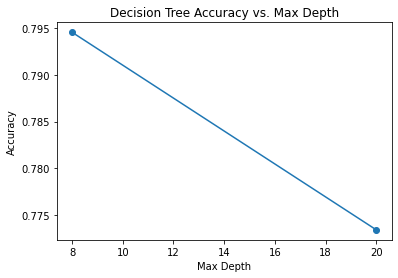

In [135]:
plt.plot(max_depth_range, acc, marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [136]:
max_depth_range = [2**i for i in range(6)] 
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Accuracy scores:
Max Depth=1, accuracy score: 0.7044078061911171
Max Depth=2, accuracy score: 0.7017160161507402
Max Depth=4, accuracy score: 0.7886944818304172
Max Depth=8, accuracy score: 0.7945827725437415
Max Depth=16, accuracy score: 0.7834791386271871
Max Depth=32, accuracy score: 0.7462987886944819


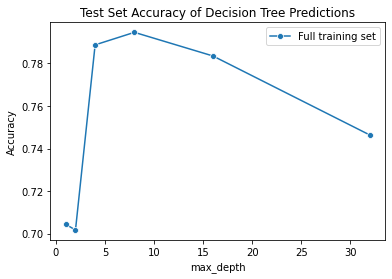

In [137]:
x = max_depth_range
fig, ax = plt.subplots()

sns.lineplot(x=x, y=acc, marker='o', label='Full training set', ax=ax)
ax.set_title('Test Set Accuracy of Decision Tree Predictions')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')

plt.show()

### Evaluating Our Decision Tree Model Using all the Features 

In [138]:
model = DecisionTreeClassifier(min_samples_leaf = 100, max_depth = 8, criterion = 'entropy')
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)

In [139]:
print("Accuracy:", accuracy_score(y_test, class_label_predictions))
print("Precision:", precision_score(y_test, class_label_predictions))
print("Recall:", recall_score(y_test, class_label_predictions))
print("F1 Score:", f1_score(y_test, class_label_predictions))

Accuracy: 0.7913862718707941
Precision: 0.7462962962962963
Recall: 0.8526093088857546
F1 Score: 0.7959183673469388


In [140]:
print(classification_report(y_test, class_label_predictions))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      3108
           1       0.75      0.85      0.80      2836

    accuracy                           0.79      5944
   macro avg       0.80      0.79      0.79      5944
weighted avg       0.80      0.79      0.79      5944



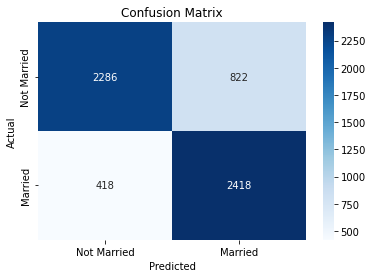

In [141]:
cm = confusion_matrix(y_test, class_label_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AUC Score: 0.8703768245376143


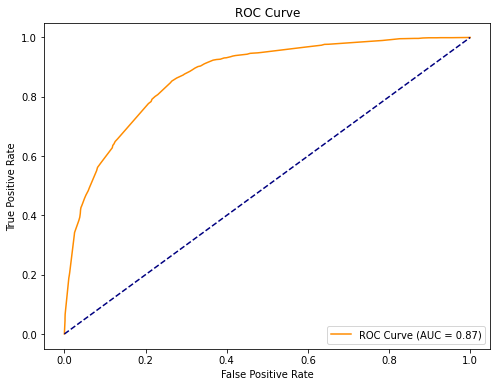

In [142]:
# Get predicted probabilities for class 1 (married)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


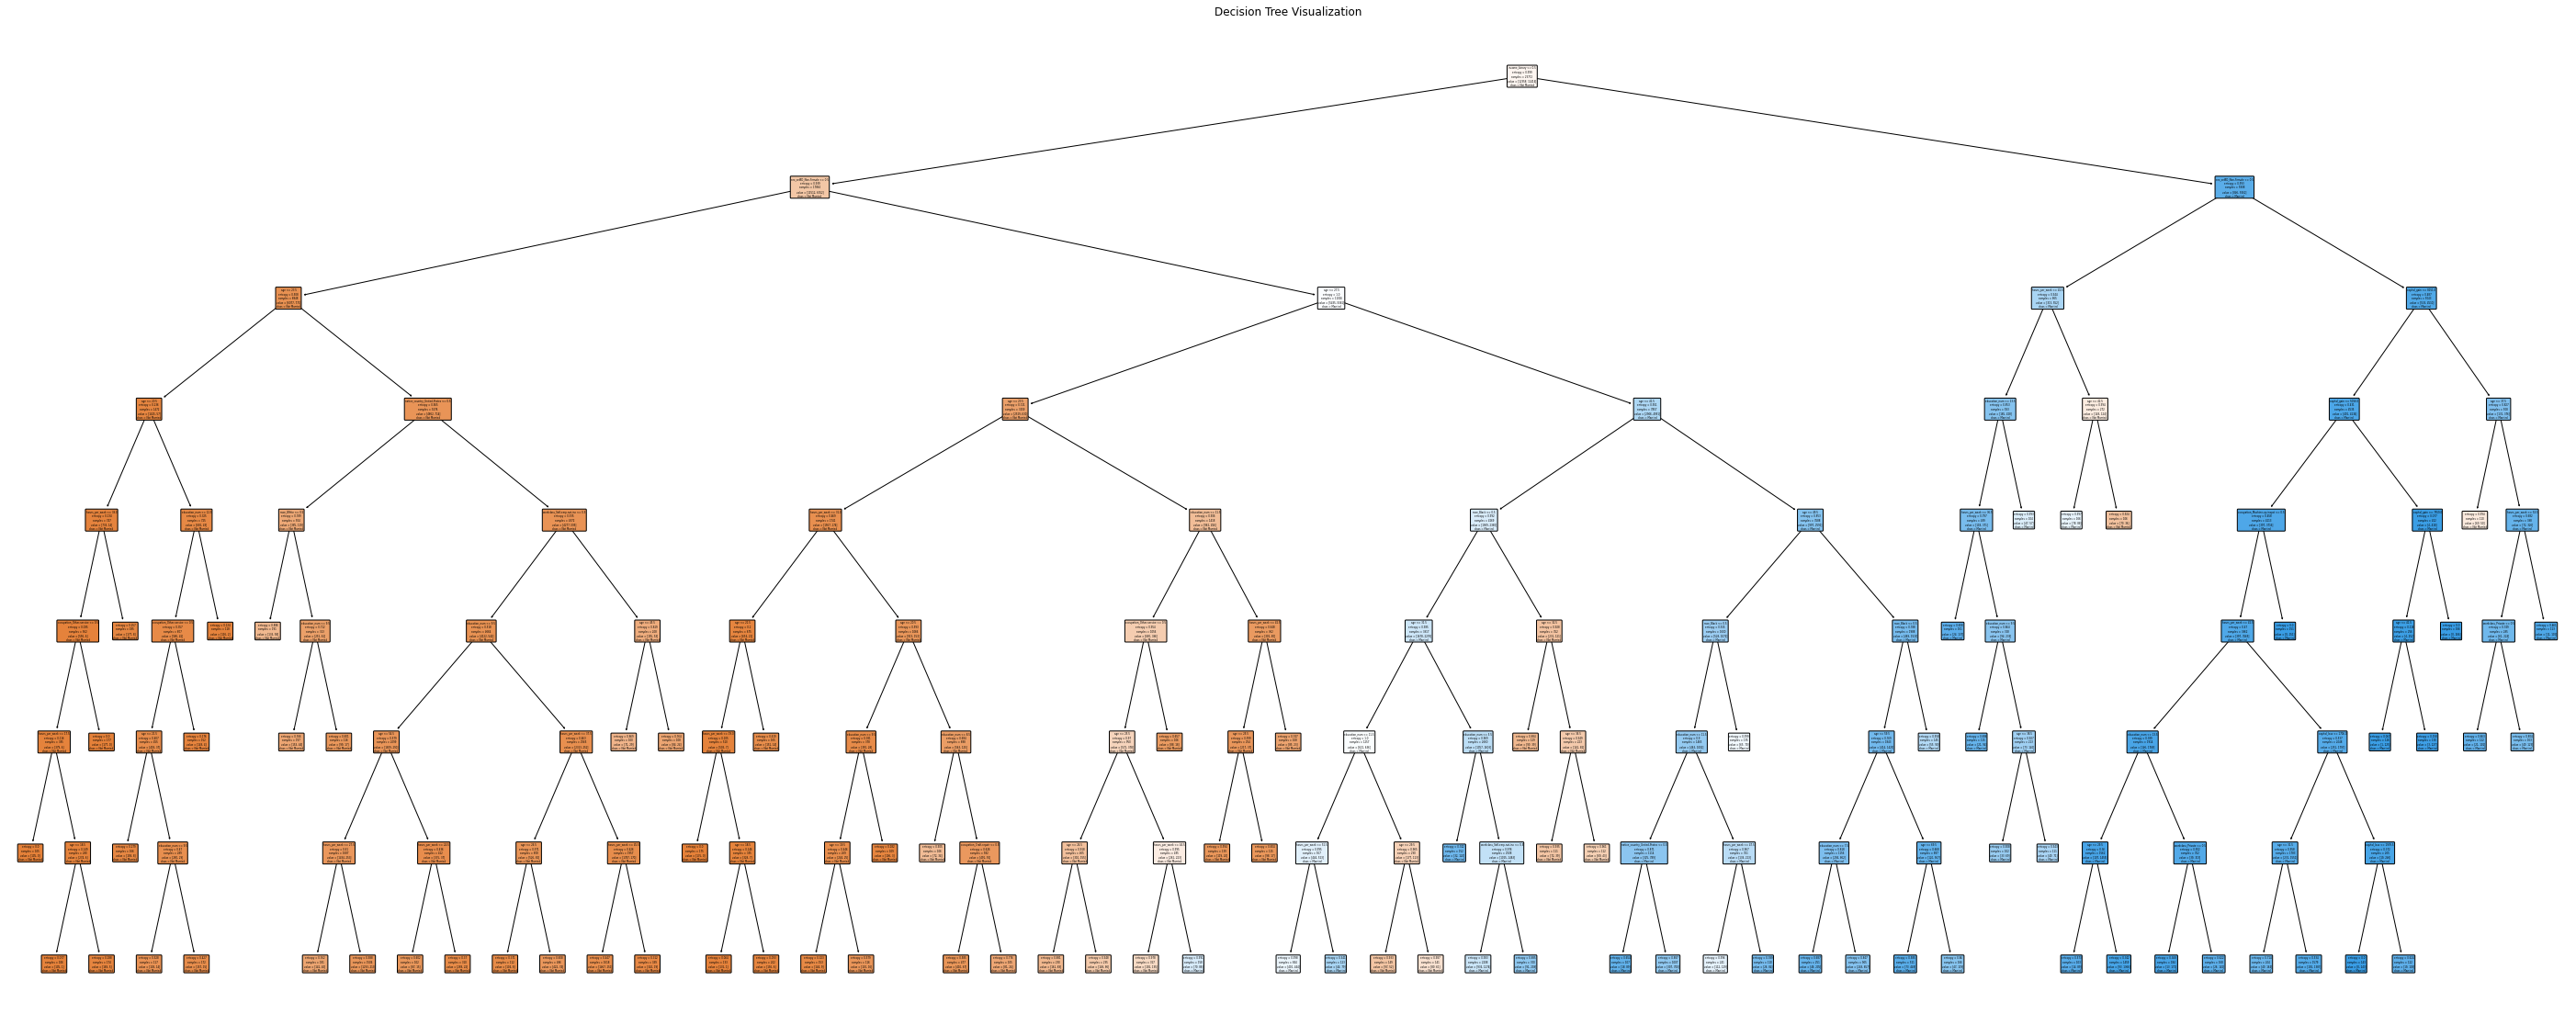

In [143]:
plt.figure(figsize=(50,20))
plot_tree(model, 
          filled=True,         
          feature_names=X.columns,  
          class_names=['Not Married', 'Married'],  
          rounded=True, 
          max_depth=8)        
plt.title("Decision Tree Visualization")
plt.show()

### Designing Decision Tree using same selected Features as Logistic Regression 

In [144]:
print(df.columns.tolist())

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_binary', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_selfID_Non-Female', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_

In [145]:
feature_list =['age', 'hours_per_week','income_binary','sex_selfID_Non-Female']
X = df[feature_list]
y = df['marital_status_binary']

### Training Data

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [147]:
tree_model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Evaluating Desicion Tree with same Features as Logisitic Regression

In [148]:
y_pred = tree_model.predict(X_test)

In [149]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7876850605652759
Precision: 0.7457838850718301
Recall: 0.842031029619182
F1 Score: 0.7909903941702552

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78      3108
           1       0.75      0.84      0.79      2836

    accuracy                           0.79      5944
   macro avg       0.79      0.79      0.79      5944
weighted avg       0.79      0.79      0.79      5944



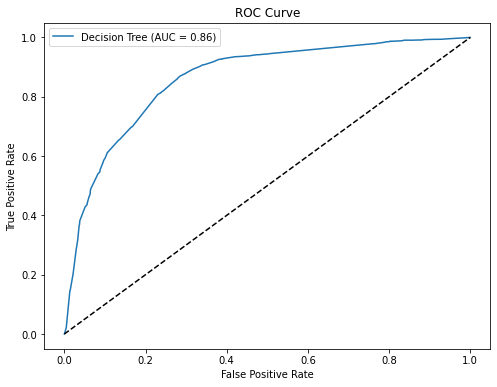

In [150]:
y_probs = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [151]:
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

AUC Score: 0.8603672809420342


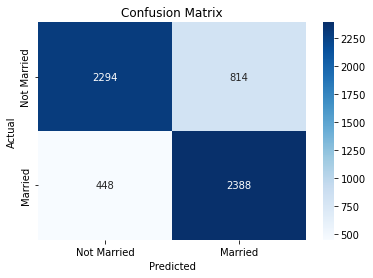

In [152]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Using Logisitic Regression

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7678331090174967
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3108
           1       0.77      0.72      0.75      2836

    accuracy                           0.77      5944
   macro avg       0.77      0.77      0.77      5944
weighted avg       0.77      0.77      0.77      5944



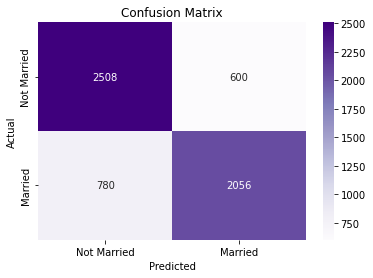

In [156]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

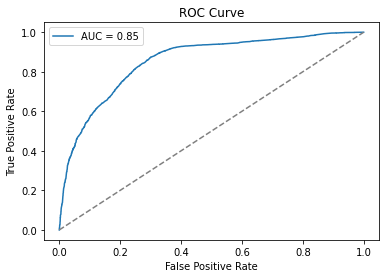

In [157]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

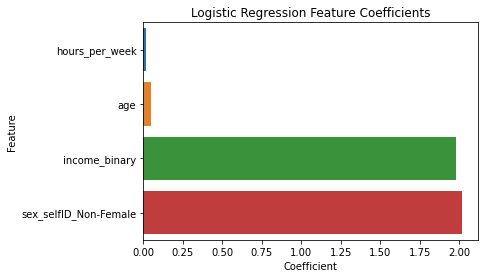

In [158]:
coeffs = pd.DataFrame({
    'Feature': feature_list,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

sns.barplot(x='Coefficient', y='Feature', data=coeffs)
plt.title('Logistic Regression Feature Coefficients')
plt.show()